# Price Prognosis - Residential Sector Key Indian Metros

##### Today we will be analysing and creating a model to predict housing prices in Indian Metropolitan Areas

###### The data for different cities is downloaded from data.gov.in

- We will be doing the following :
    - Reading the data frames
    - Merging them
    - Performing EDA
    - Feature selection through different models
    - Creating the models

###### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###### reading the data

In [2]:
d1 = pd.read_csv('Mumbai.csv')
d2 = pd.read_csv('Kolkata.csv')
d3 = pd.read_csv('Hyderabad.csv')
d4 = pd.read_csv('Delhi.csv')
d5 = pd.read_csv('Chennai.csv')
d6 = pd.read_csv('Bangalore.csv')


In [3]:
d1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [4]:
d2.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,2235000,1016,Barasat,3,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,3665999,1111,Keshtopur,2,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3774000,1020,Rajarhat,2,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2524000,935,Narendrapur,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,8300000,1956,New Town,3,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0


In [5]:
d3.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
d4.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
d5.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [8]:
d6.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


###### Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment but these values don't ascertain the absence of such a feature in real life. We will be dropping these values so that they don't cloud our analysis.

In [9]:
d1.replace(9, np.nan, inplace=True)
d2.replace(9, np.nan, inplace=True)
d3.replace(9, np.nan, inplace=True)
d4.replace(9, np.nan, inplace=True)
d5.replace(9, np.nan, inplace=True)
d6.replace(9, np.nan, inplace=True)

###### cleaning the data

In [10]:
d1.dropna(inplace = True)
d2.dropna(inplace = True)
d3.dropna(inplace = True)
d4.dropna(inplace = True)
d5.dropna(inplace = True)
d6.dropna(inplace = True)

In [11]:
print(f'Mumbai       : {d1.shape}')
print(f'Kolkata      : {d2.shape}')
print(f'Hyderabad    : {d3.shape}')
print(f'Delhi        : {d4.shape}')
print(f'Chennai      : {d5.shape}')
print(f'Bangalore    : {d6.shape}')

Mumbai       : (1398, 40)
Kolkata      : (75, 40)
Hyderabad    : (2434, 40)
Delhi        : (2002, 40)
Chennai      : (2233, 40)
Bangalore    : (1951, 40)


###### Adding features to the data frame, to prepare it for merging.

In [12]:
d1['City'] = 'Mumbai'
d2['City'] = 'Kolkata'
d3['City'] = 'Hyderabad'
d4['City'] = 'Delhi'
d5['City'] = 'Chennai'
d6['City'] = 'Bangalore'

In [13]:
print(f'Features & Data types of the Data Frame :\n{d1.dtypes}')

Features & Data types of the Data Frame :
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float

In [14]:
#!pip install geopy

In [15]:
from geopy.geocoders import Nominatim

In [16]:
geolocator = Nominatim(user_agent="Faizan")

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long

In [17]:
#feature_generation(d1)
#feature_generation(d2)
#feature_generation(d3)
#feature_generation(d4)
#feature_generation(d5)
#feature_generation(d6)

In [18]:
#df = pd.concat([d1,d2,d3,d4,d5,d6])

In [23]:
#df.to_csv('India.csv')

###### After this I have saved the merged data in India.csv Now reading the dataset again

In [19]:
df = pd.read_csv('India.csv')

In [20]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [21]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,4850000,720,Kharghar,1.0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511
1,4500000,600,Kharghar,1.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511
2,6700000,650,Kharghar,1.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511
3,4500000,650,Kharghar,1.0,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Mumbai,19.05253,73.073511
4,5000000,665,Kharghar,1.0,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511


In [22]:
df.tail()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
10088,8306999,1184,Hosa Road,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore,12.871047,77.660503
10089,4883000,655,Hosa Road,1.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore,12.871047,77.660503
10090,11500000,1680,Hosa Road,3.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore,12.871047,77.660503
10091,8378000,1195,Hosa Road,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore,12.871047,77.660503
10092,5951000,820,Hosa Road,1.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bangalore,12.871047,77.660503


In [24]:
df.isna().sum()

Price                    0
Area                     0
Location                 0
No. of Bedrooms          0
Resale                   0
MaintenanceStaff         0
Gymnasium                0
SwimmingPool             0
LandscapedGardens        0
JoggingTrack             0
RainWaterHarvesting      0
IndoorGames              0
ShoppingMall             0
Intercom                 0
SportsFacility           0
ATM                      0
ClubHouse                0
School                   0
24X7Security             0
PowerBackup              0
CarParking               0
StaffQuarter             0
Cafeteria                0
MultipurposeRoom         0
Hospital                 0
WashingMachine           0
Gasconnection            0
AC                       0
Wifi                     0
Children'splayarea       0
LiftAvailable            0
BED                      0
VaastuCompliant          0
Microwave                0
GolfCourse               0
TV                       0
DiningTable              0
S

In [25]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,4850000,720,Kharghar,1.0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511
1,4500000,600,Kharghar,1.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511
2,6700000,650,Kharghar,1.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511
3,4500000,650,Kharghar,1.0,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Mumbai,19.05253,73.073511
4,5000000,665,Kharghar,1.0,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.05253,73.073511


###### setting the colors for cities

In [26]:
custom_colors = ["aquamarine", "orchid","plum","coral","lightgreen","violet"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

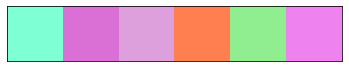

In [27]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

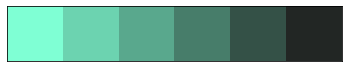

In [28]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

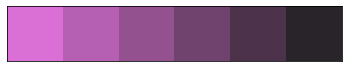

In [29]:
kolkata = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(kolkata),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

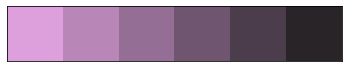

In [30]:
hyderabad = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

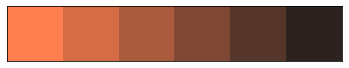

In [31]:
delhi = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

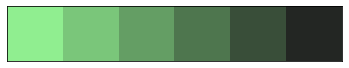

In [32]:
chennai = sns.dark_palette(custom_colors[4], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

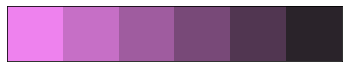

In [33]:
bangalore = sns.dark_palette(custom_colors[5], reverse=True)
sns.palplot(sns.color_palette(bangalore),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

### EDA

In [34]:
sns.set_style("whitegrid")

In [35]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

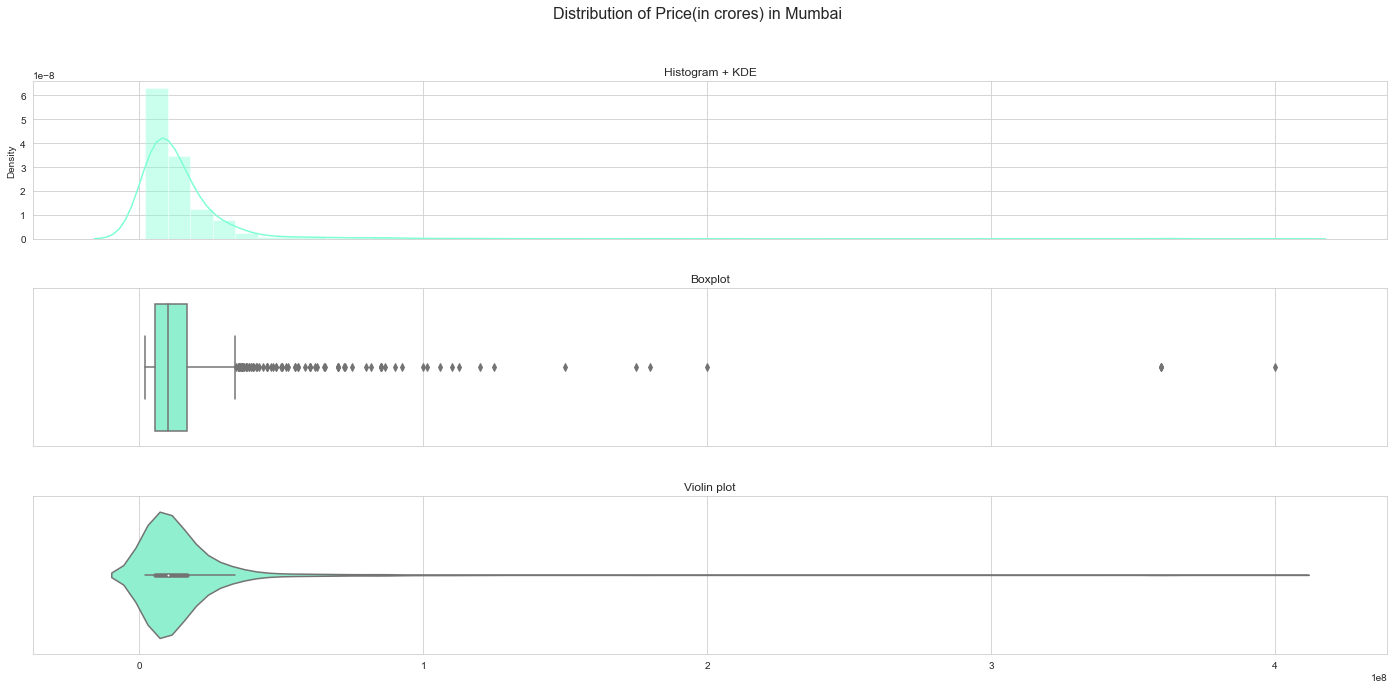

In [36]:
triple_plot(d1['Price'],'Distribution of Price(in crores) in Mumbai',custom_colors[0])

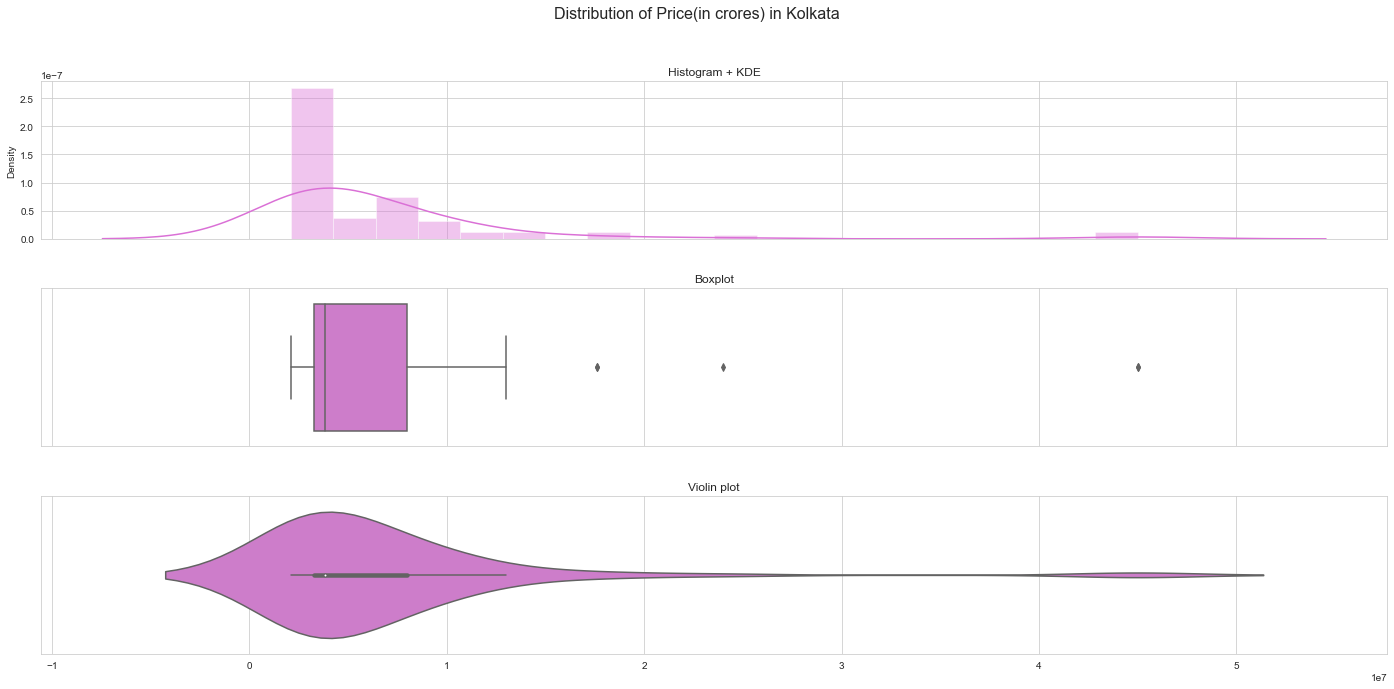

In [37]:
triple_plot(d2['Price'],'Distribution of Price(in crores) in Kolkata',custom_colors[1])

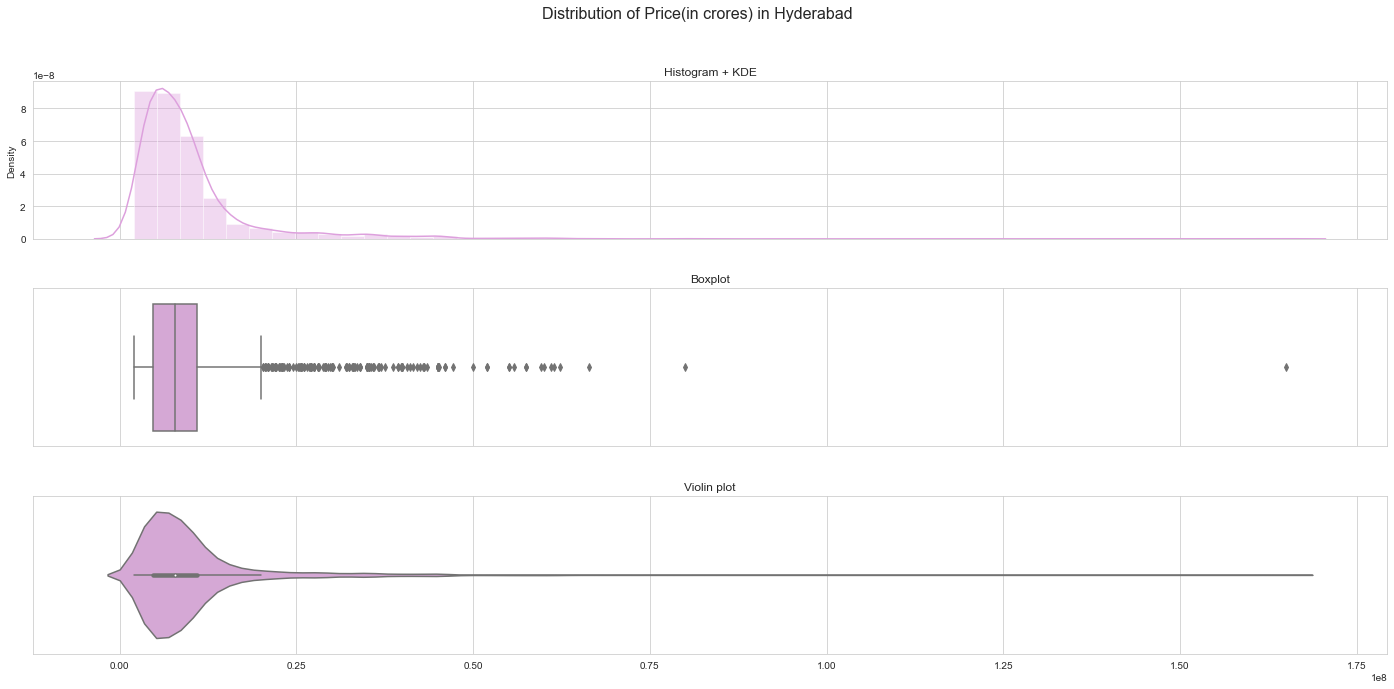

In [38]:
triple_plot(d3['Price'],'Distribution of Price(in crores) in Hyderabad',custom_colors[2])

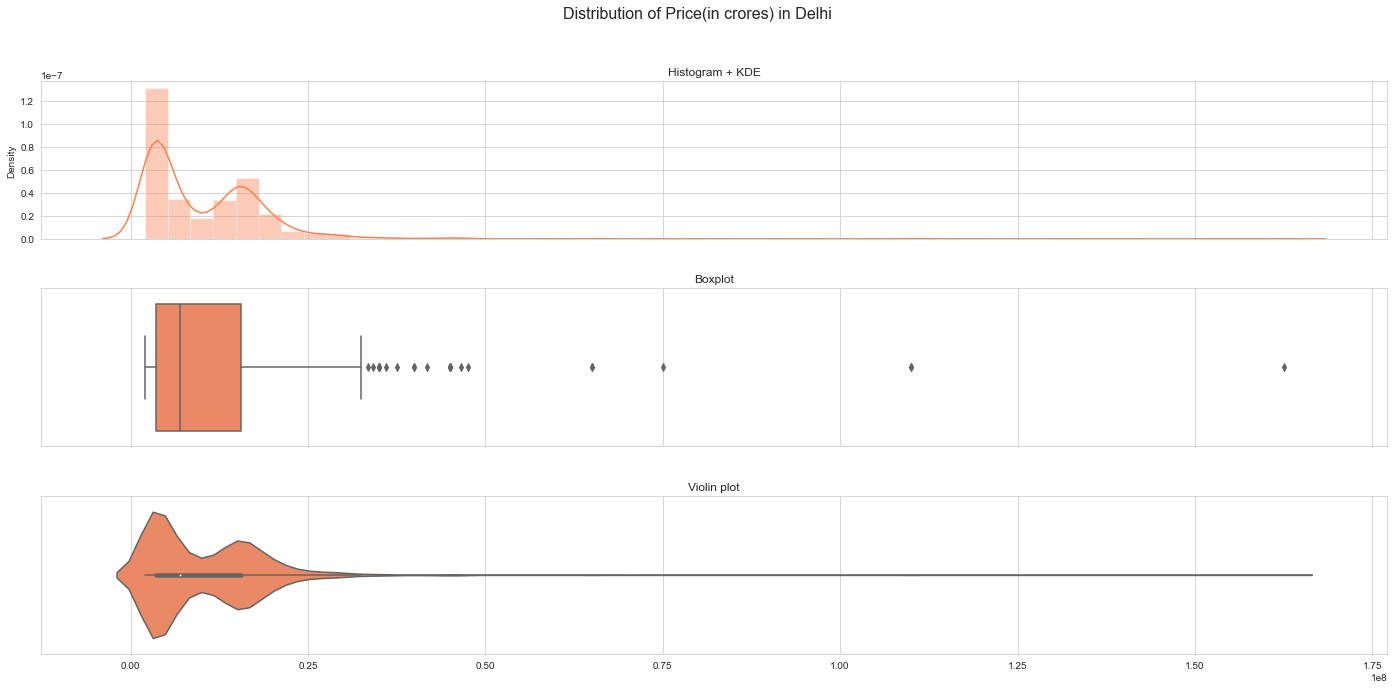

In [39]:
triple_plot(d4['Price'],'Distribution of Price(in crores) in Delhi',custom_colors[3])

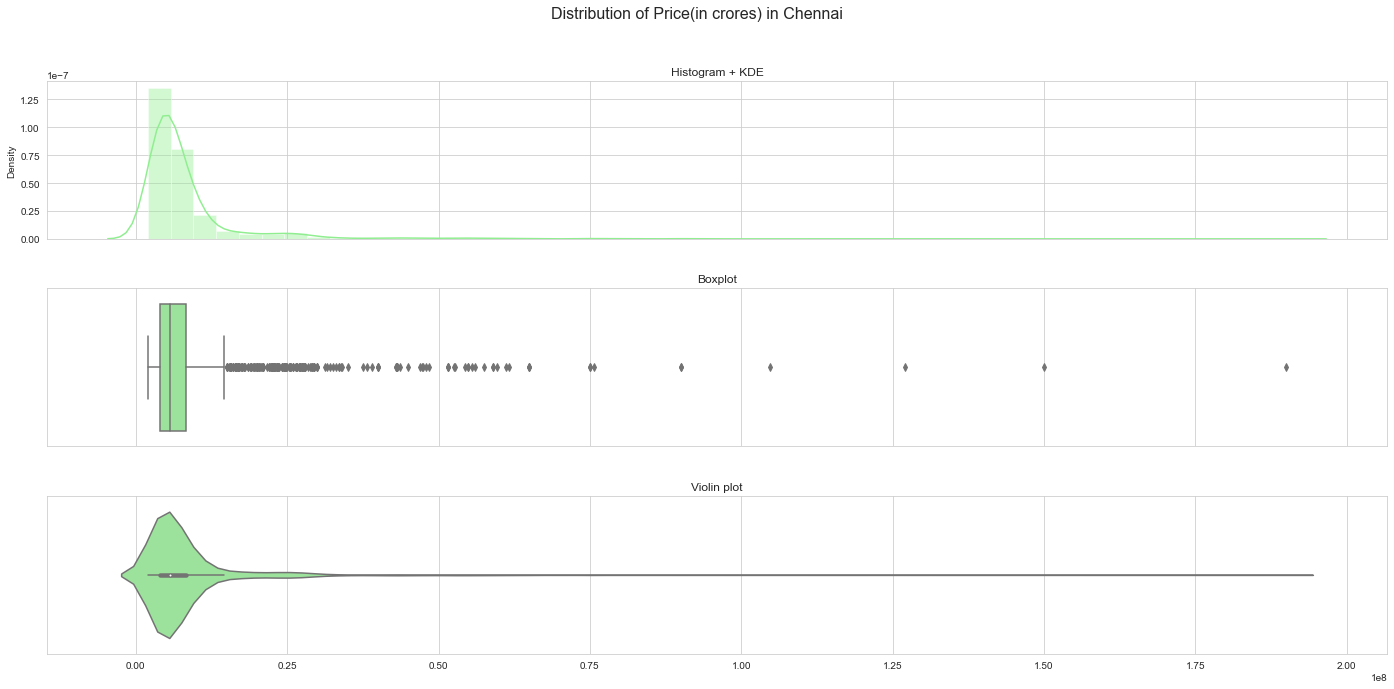

In [40]:
triple_plot(d5['Price'],'Distribution of Price(in crores) in Chennai',custom_colors[4])

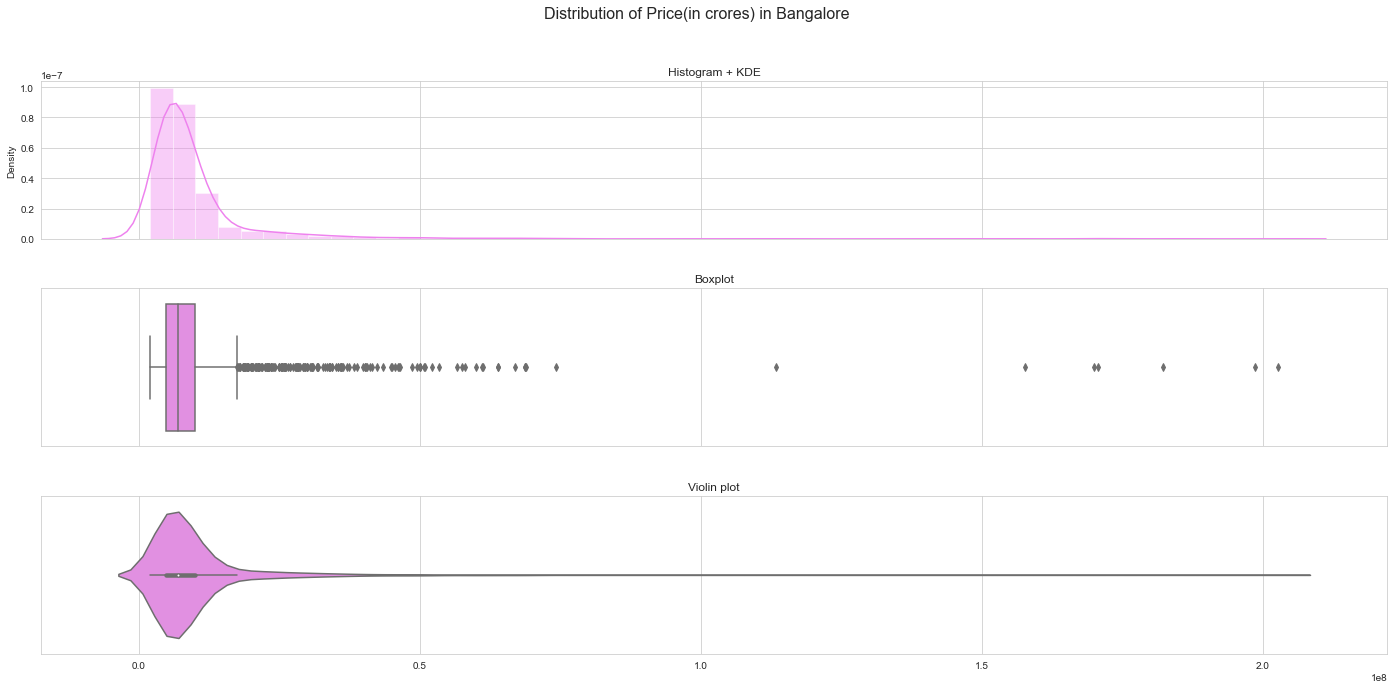

In [41]:
triple_plot(d6['Price'],'Distribution of Price(in crores) in Bangalore',custom_colors[5])

In [42]:
def count_plot(data,title,p):
    dfr1=data[data['Resale']== 0]
    dfr2=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=dfr1, order=dfr1.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=dfr2, order=dfr2.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

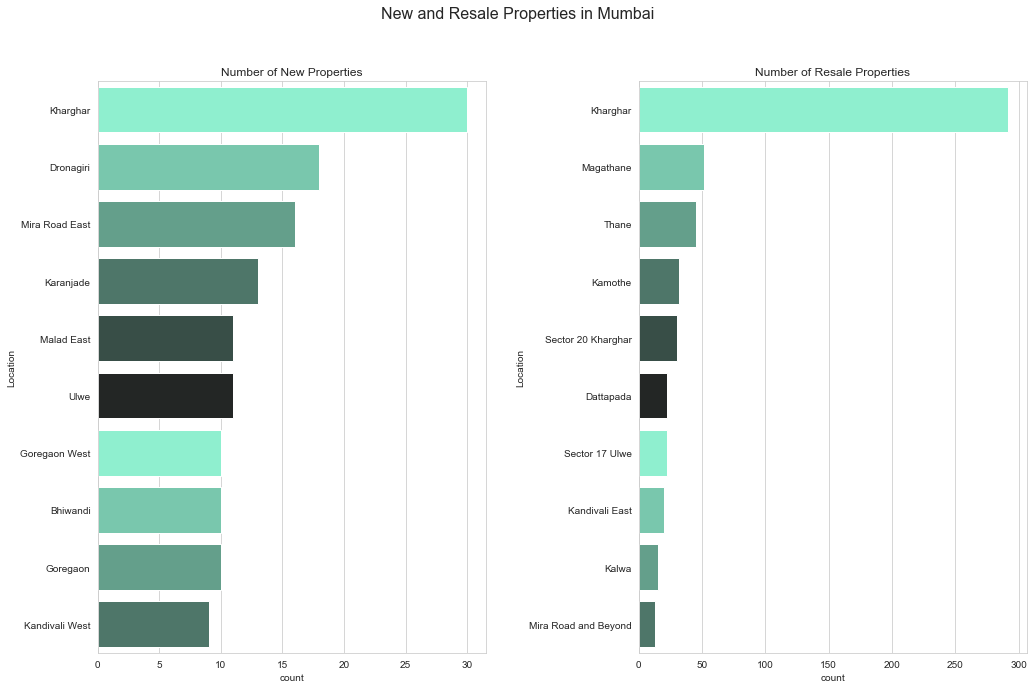

In [43]:
count_plot(d1,'New and Resale Properties in Mumbai',mumbai)

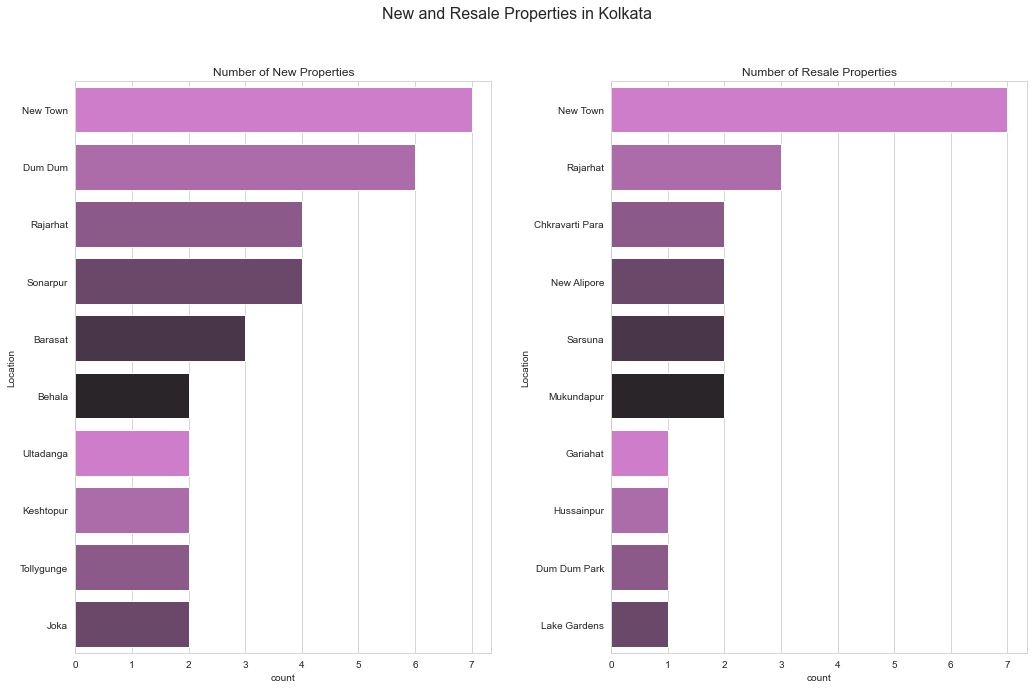

In [44]:
count_plot(d2,'New and Resale Properties in Kolkata',kolkata)

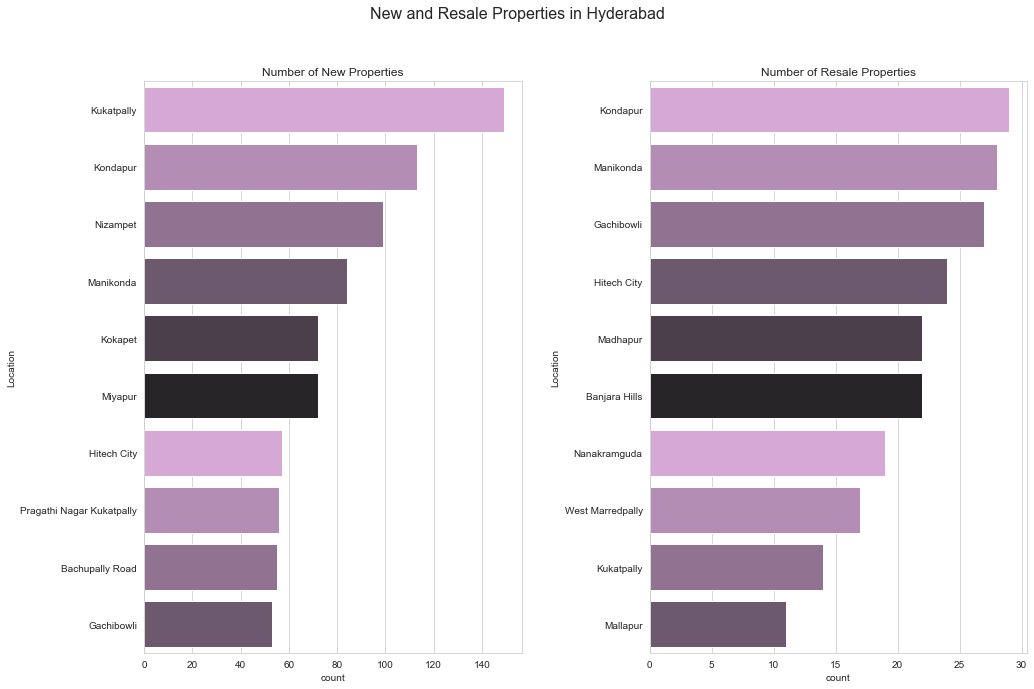

In [45]:
count_plot(d3,'New and Resale Properties in Hyderabad',hyderabad)

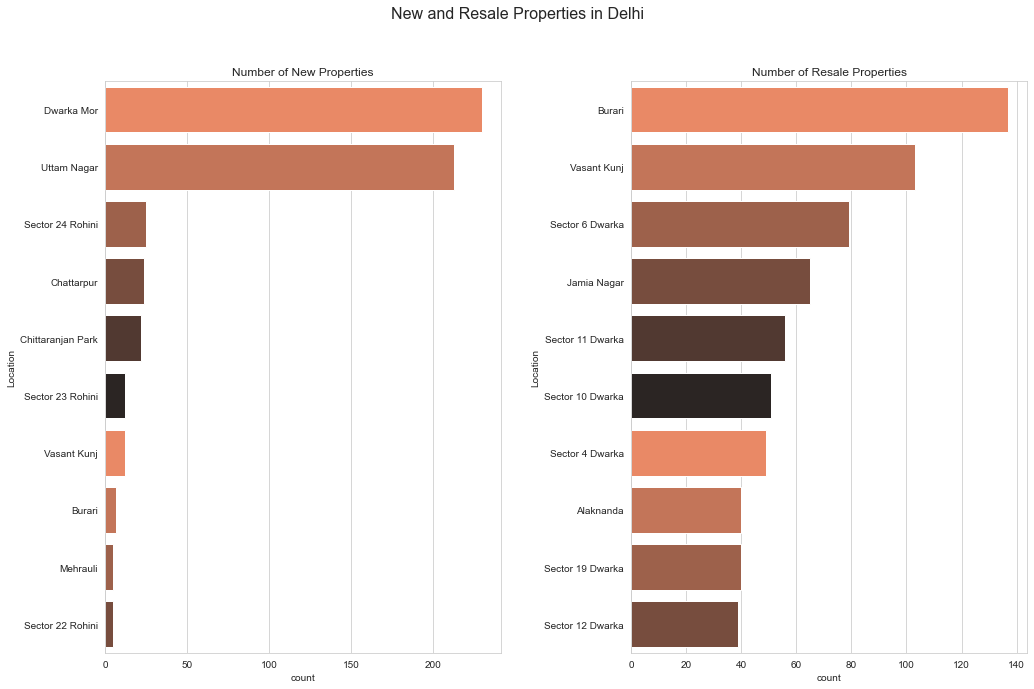

In [46]:
count_plot(d4,'New and Resale Properties in Delhi',delhi)

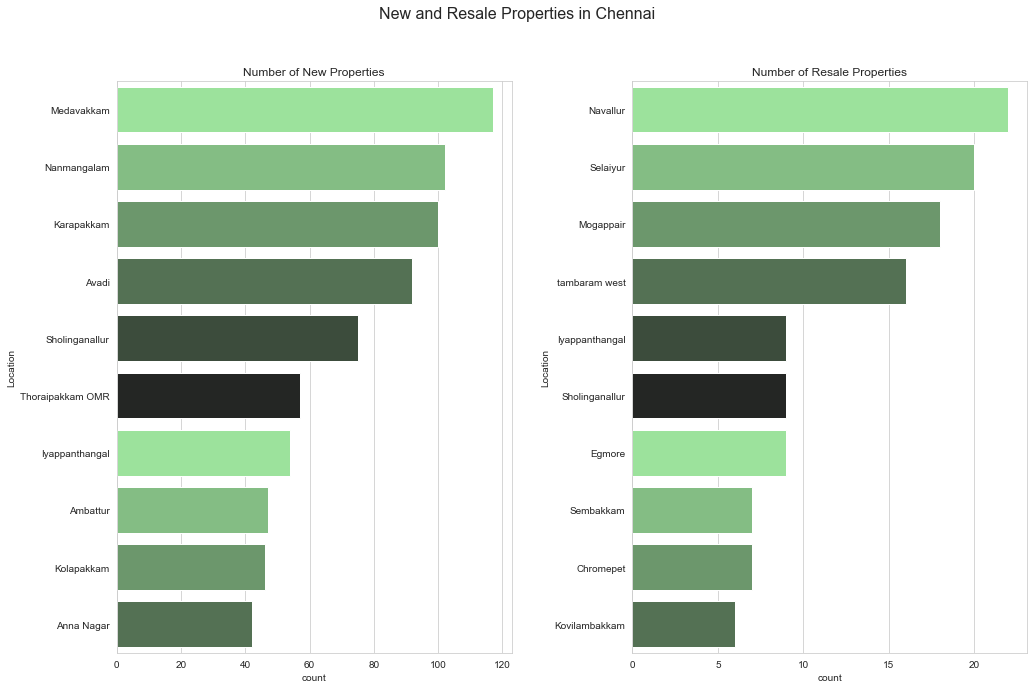

In [47]:
count_plot(d5,'New and Resale Properties in Chennai',chennai)

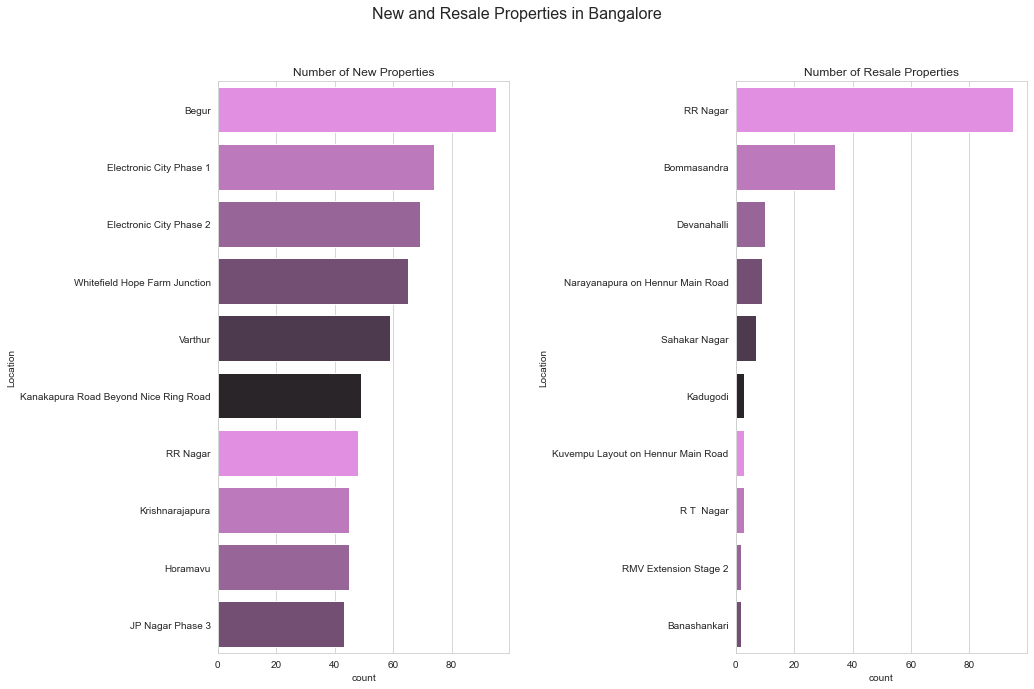

In [48]:
count_plot(d6,'New and Resale Properties in Bangalore',bangalore)

In [49]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price(cr) in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

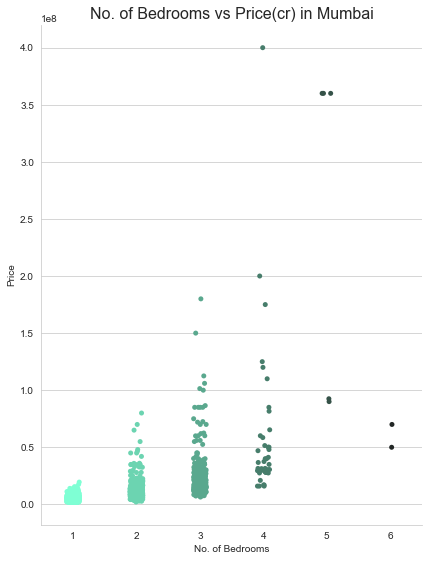

In [50]:
cat_plot(d1,'Mumbai',mumbai)

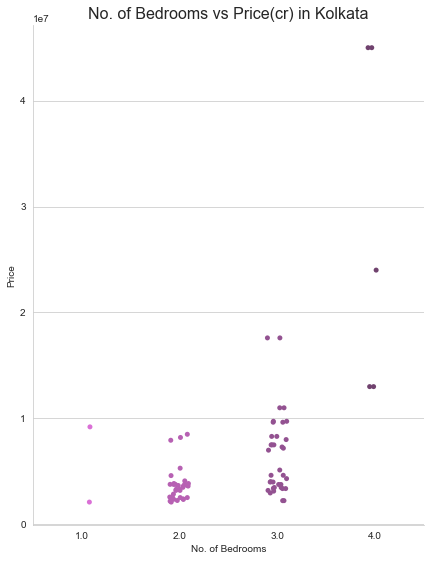

In [51]:
cat_plot(d2,'Kolkata',kolkata)

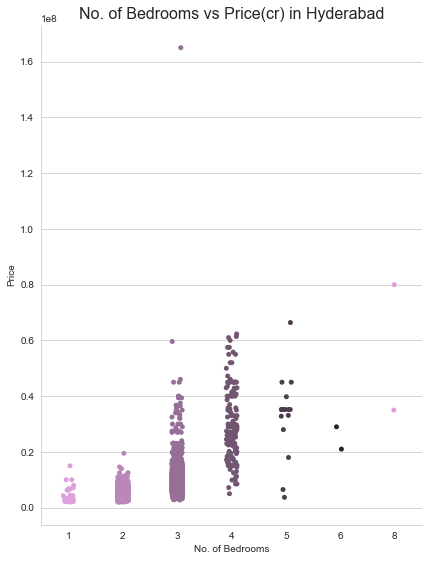

In [52]:
cat_plot(d3,'Hyderabad',hyderabad)

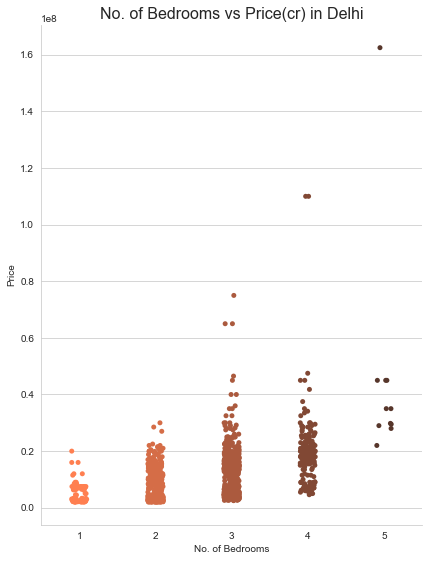

In [53]:
cat_plot(d4,'Delhi',delhi)

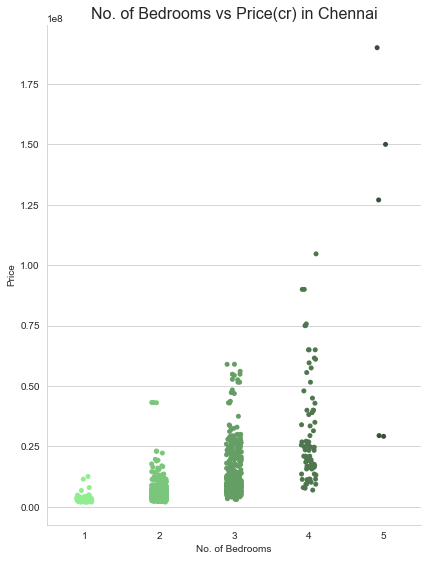

In [54]:
cat_plot(d5,'Chennai',chennai)

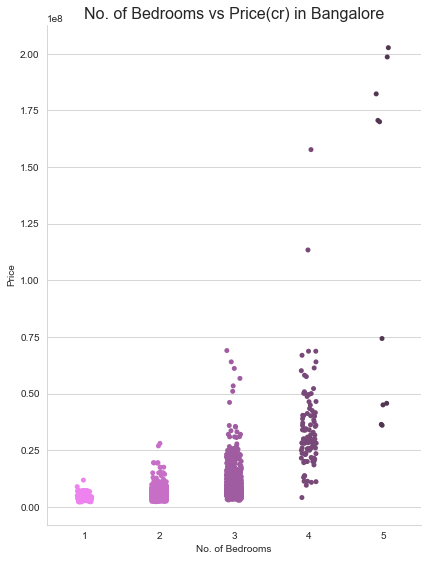

In [55]:
cat_plot(d6,'Bangalore',bangalore)

In [56]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price(cr) in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

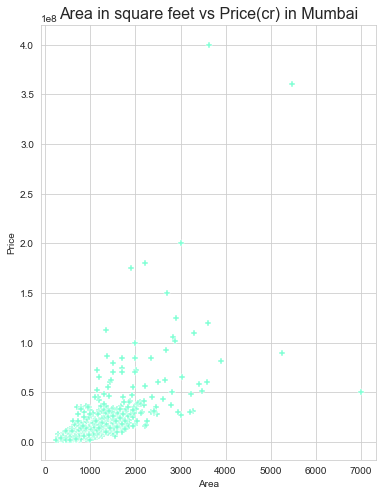

In [57]:
scatter_plot(d1,'Mumbai',custom_colors[0])

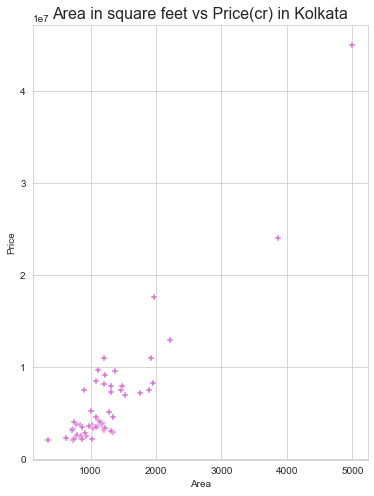

In [58]:
scatter_plot(d2,'Kolkata',custom_colors[1])

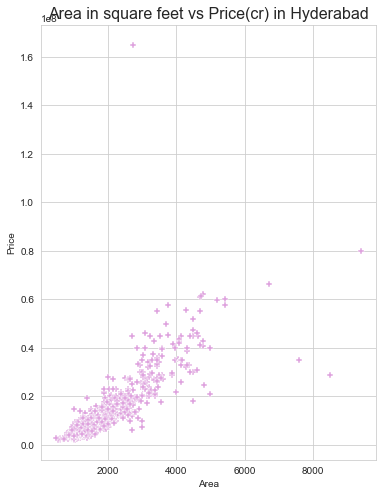

In [59]:
scatter_plot(d3,'Hyderabad',custom_colors[2])

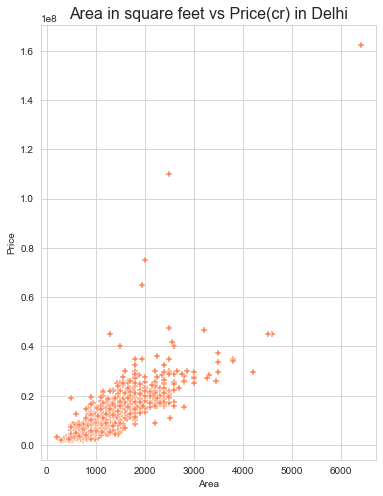

In [60]:
scatter_plot(d4,'Delhi',custom_colors[3])

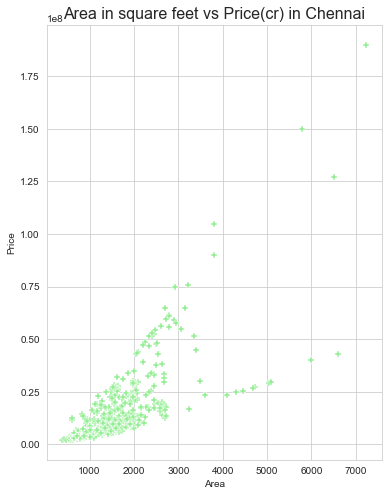

In [61]:
scatter_plot(d5,'Chennai',custom_colors[4])

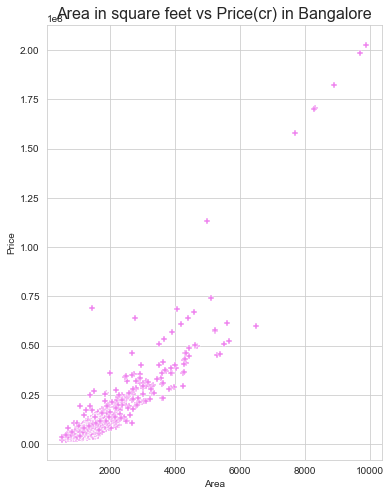

In [62]:
scatter_plot(d6,'Bangalore',custom_colors[5])

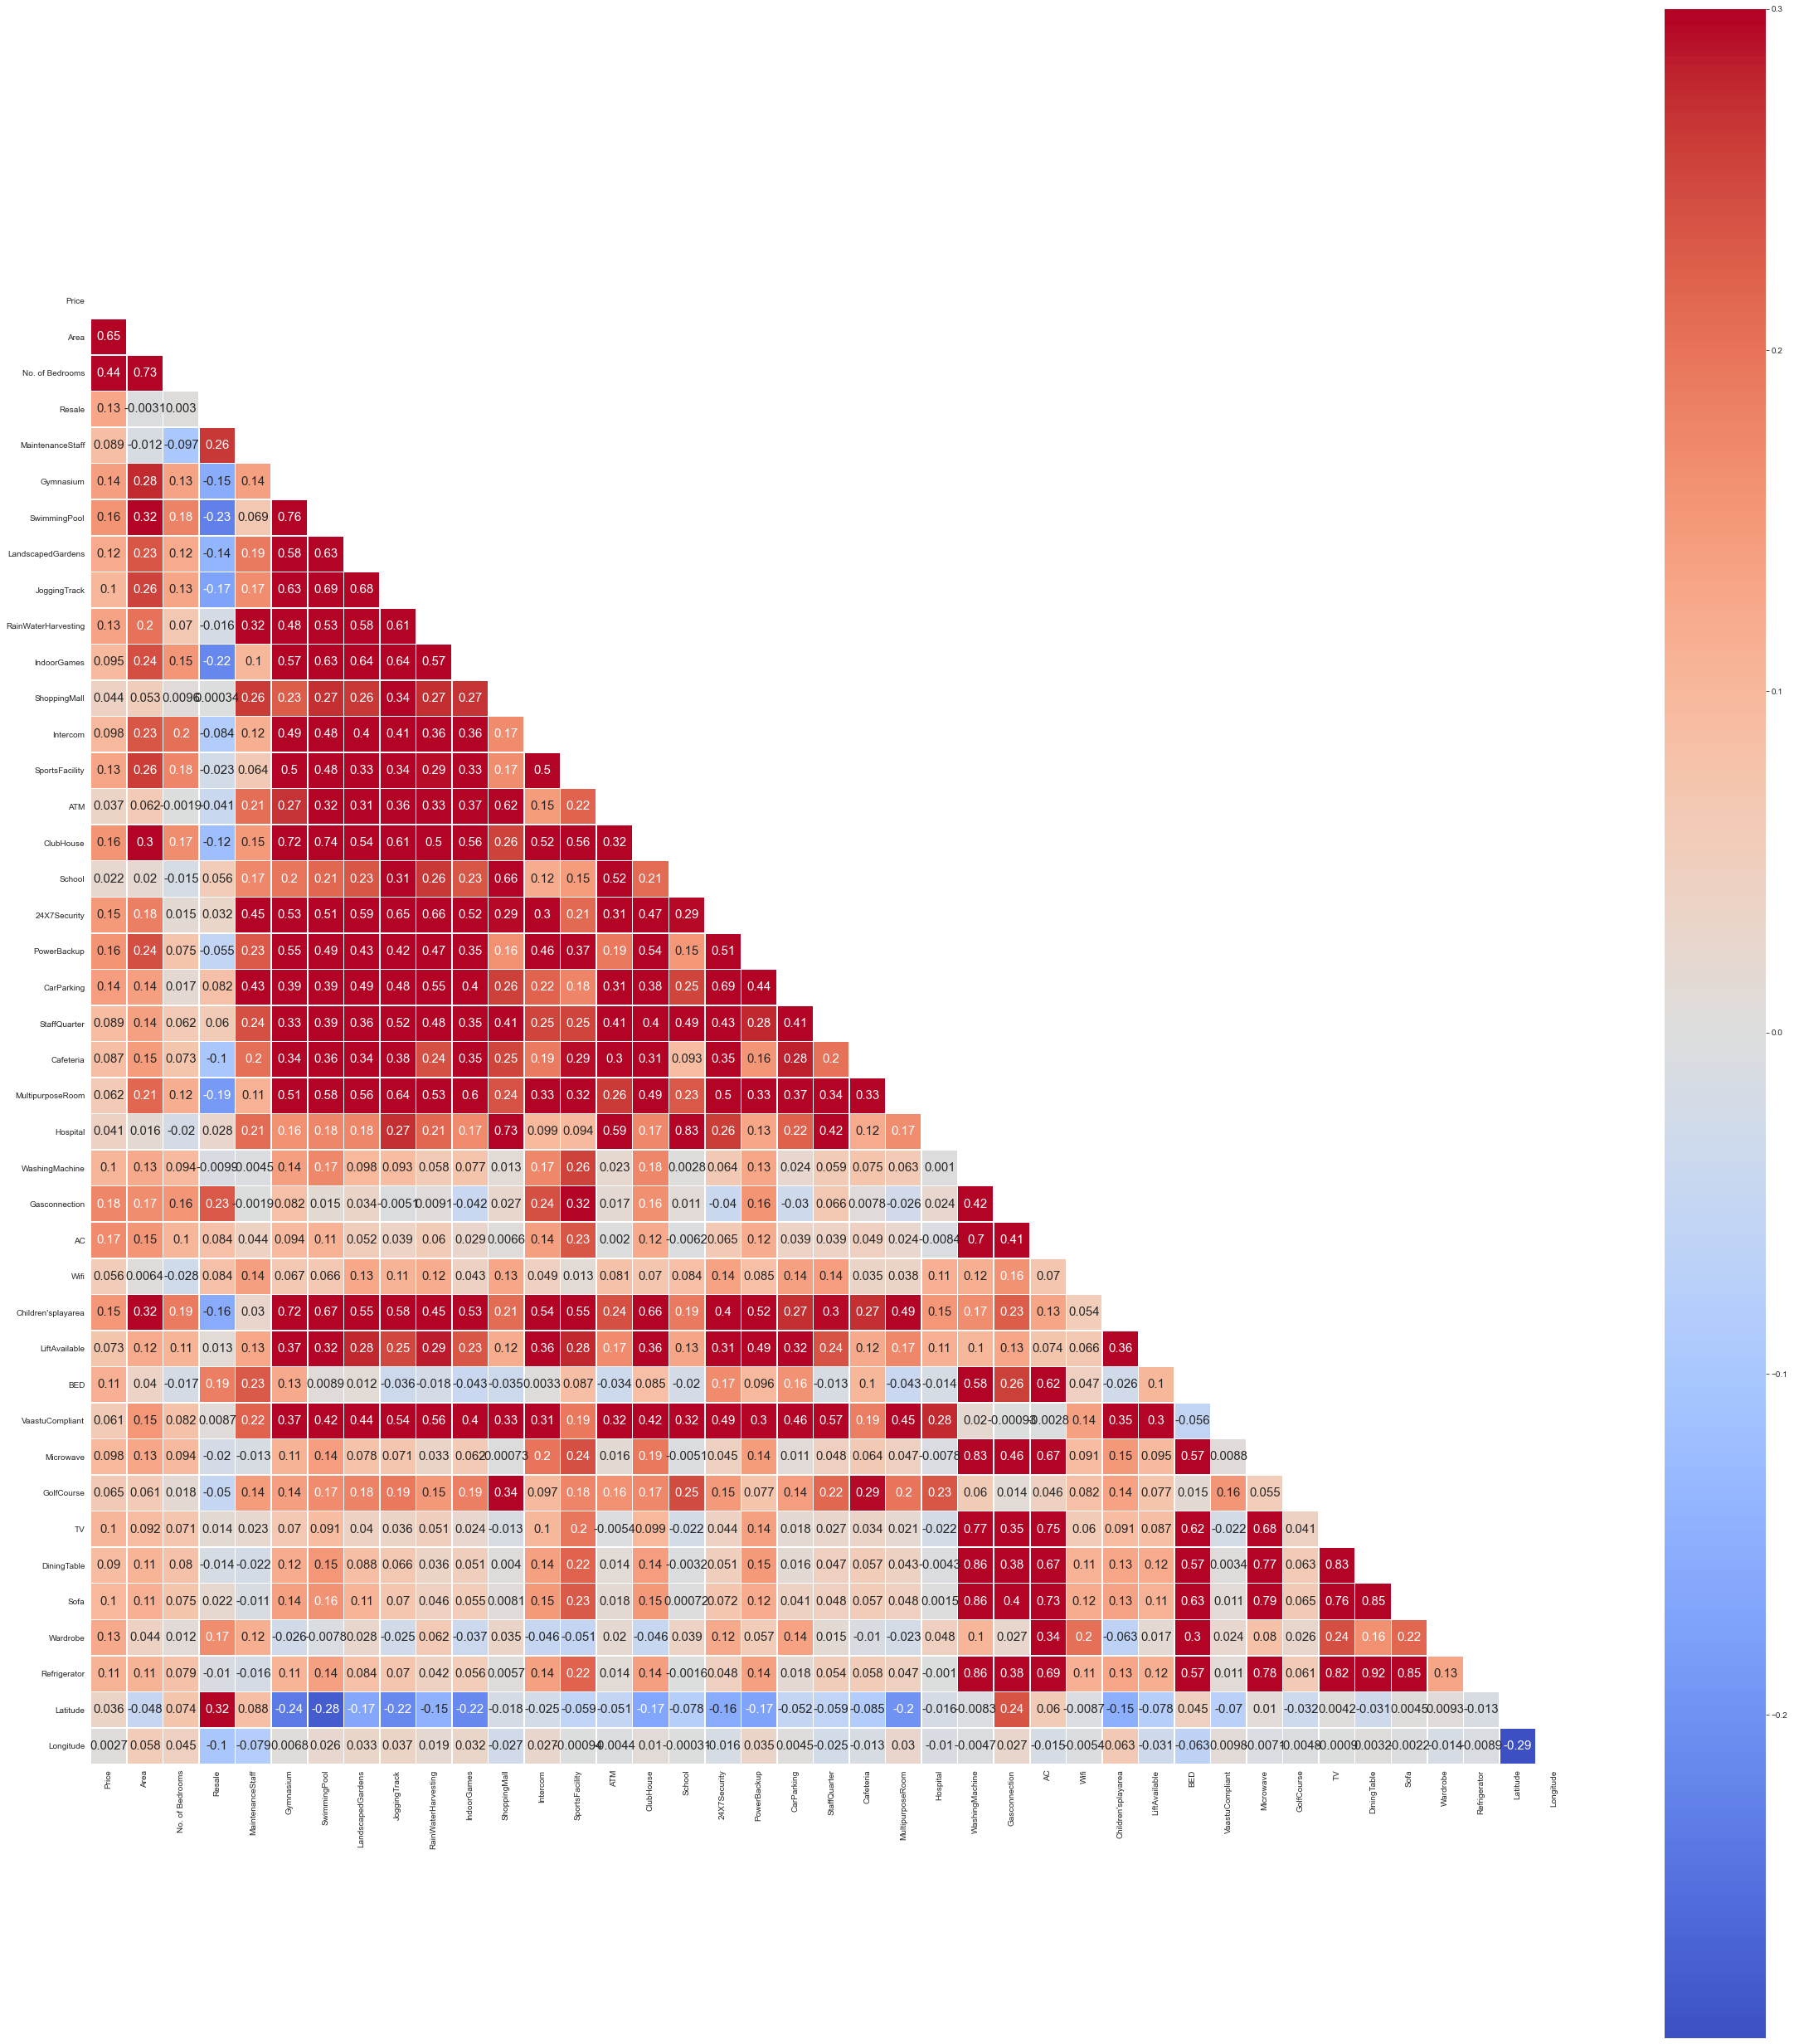

In [63]:
plt.figure(figsize=(40,45))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5,annot=True, annot_kws={"size":15})
plt.show()

In [64]:
df.replace('NA', np.nan,inplace=True)
df.dropna(inplace=True)

###### preprocessing Data

In [65]:
l = list(df.columns)
l.pop(0)
l

['Area',
 'Location',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator',
 'City',
 'Latitude',
 'Longitude']

In [66]:
l.pop(1)
l.pop(-3)
l

['Area',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator',
 'Latitude',
 'Longitude']

In [67]:
x = df[l]
y = df.iloc[:,0]

###### Splitting the data in test and train parts

In [68]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [69]:
from sklearn.ensemble import RandomForestRegressor

###### Feature selection on the basis of its importance

In [70]:
rf = RandomForestRegressor()
model = rf.fit(xtrain,ytrain)

In [71]:
#!pip install eli5

In [72]:
import eli5
from eli5.sklearn import PermutationImportance

In [73]:
perm = PermutationImportance(model, random_state=1).fit(xtrain, ytrain)
eli5.show_weights(perm, feature_names = xtrain.columns.tolist())

Weight,Feature
1.2429 ± 0.1053,Area
0.6155 ± 0.1161,Longitude
0.1655 ± 0.0125,Latitude
0.0262 ± 0.0054,TV
0.0121 ± 0.0005,No. of Bedrooms
0.0116 ± 0.0014,Resale
0.0093 ± 0.0001,Wardrobe
0.0066 ± 0.0022,PowerBackup
0.0054 ± 0.0019,Intercom
0.0053 ± 0.0031,24X7Security


In [76]:
from sklearn.ensemble import ExtraTreesRegressor

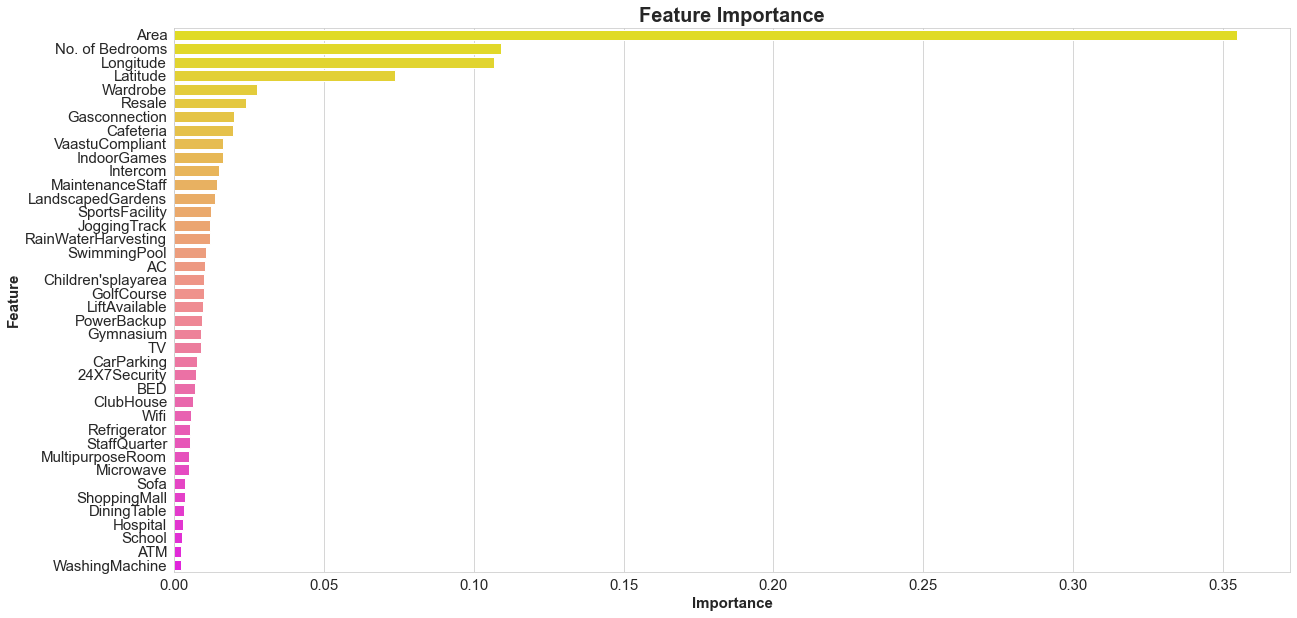

In [77]:
et = ExtraTreesRegressor()
et.fit(xtrain, ytrain)
fi = pd.DataFrame(et.feature_importances_,
             columns=['importance'])
fi['feature'] = l
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

###### selecting the features and creating the models

In [78]:
features = ['Area','No. of Bedrooms','Resale','Gasconnection','VaastuCompliant','Cafeteria','LandscapedGardens','IndoorGames','Intercom','MaintenanceStaff','24X7Security','Latitude','Longitude']

x = df[features]
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.3, random_state=1)

In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [80]:
def train_model(m,name):
    model = m
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    mae = mean_absolute_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    print(f'{name} --> mae : {mae} || r2  : {r2*100}%')

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor --> mae : 1942523.8094875116 || r2  : 78.71406497527933%
Random Forest Regressor --> mae : 1774983.9596918973 || r2  : 85.14640841537768%
XGBoost Regressor --> mae : 1604859.6187838449 || r2  : 85.02237253269045%


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
def cvs_mean(model, name):
    print(name)
    cvs = cross_val_score(model,x,y,cv=20)
    print(cvs.mean())
    print("\n")
        
cvs_mean(DecisionTreeRegressor(),"Decision Tree Regressor")
cvs_mean(RandomForestRegressor(),"Random Forest Regressor")   
cvs_mean(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor
0.2868065357726234


Random Forest Regressor
0.6494071709475675


XGBoost Regressor
0.6479692717652179




#### Hyperparameter Tuning

In [96]:
 for i in range (15):
    for j in range (1,15):
        for k in range (1,13):
            rf = RandomForestRegressor(random_state=i, n_estimators=j, max_features=k)
            rf.fit(xtrain,ytrain)
            ypred = rf.predict(xtest)
            ac = r2_score(ytest,ypred)
            print(f"{i} | {j}  | {k} :- {ac}")

0 | 1  | 1 :- 0.44276618929990086
0 | 1  | 2 :- 0.6814595712224745
0 | 1  | 3 :- 0.17138126754159067
0 | 1  | 4 :- 0.5236217950591278
0 | 1  | 5 :- 0.06549572930184011
0 | 1  | 6 :- -0.12407487226873593
0 | 1  | 7 :- 0.1609880657649787
0 | 1  | 8 :- 0.7716698960058509
0 | 1  | 9 :- 0.7622952590302562
0 | 1  | 10 :- 0.7115389716819694
0 | 1  | 11 :- 0.3373185281240231
0 | 1  | 12 :- 0.3809459263247652
0 | 2  | 1 :- 0.6579917784472771
0 | 2  | 2 :- 0.70932801651083
0 | 2  | 3 :- 0.6198943794839231
0 | 2  | 4 :- 0.7046011575491461
0 | 2  | 5 :- 0.4123991542598082
0 | 2  | 6 :- 0.26678209595349034
0 | 2  | 7 :- 0.624049552166002
0 | 2  | 8 :- 0.7634359714131558
0 | 2  | 9 :- 0.8240805312960805
0 | 2  | 10 :- 0.6600963803702181
0 | 2  | 11 :- 0.5649375433993142
0 | 2  | 12 :- 0.4239302843522541
0 | 3  | 1 :- 0.7759521683997612
0 | 3  | 2 :- 0.7396372522633687
0 | 3  | 3 :- 0.757276804060096
0 | 3  | 4 :- 0.7099969226488372
0 | 3  | 5 :- 0.4752513367753146
0 | 3  | 6 :- 0.40281618616596826
0

1 | 7  | 8 :- 0.8743529388523803
1 | 7  | 9 :- 0.8304565258243717
1 | 7  | 10 :- 0.8371144316519954
1 | 7  | 11 :- 0.7978832715921068
1 | 7  | 12 :- 0.820284289579374
1 | 8  | 1 :- 0.8143736798704778
1 | 8  | 2 :- 0.8502174891621233
1 | 8  | 3 :- 0.8438434473085916
1 | 8  | 4 :- 0.8831700481405095
1 | 8  | 5 :- 0.8486903582633599
1 | 8  | 6 :- 0.876970821154448
1 | 8  | 7 :- 0.8713047185437242
1 | 8  | 8 :- 0.8802356701742936
1 | 8  | 9 :- 0.8380030725264347
1 | 8  | 10 :- 0.8511101056126986
1 | 8  | 11 :- 0.8181221023440031
1 | 8  | 12 :- 0.8293927422556081
1 | 9  | 1 :- 0.8235426702978997
1 | 9  | 2 :- 0.8445774968344828
1 | 9  | 3 :- 0.8520236601696045
1 | 9  | 4 :- 0.8828260066148762
1 | 9  | 5 :- 0.8555000062533498
1 | 9  | 6 :- 0.8740482300556944
1 | 9  | 7 :- 0.8635017791061339
1 | 9  | 8 :- 0.8682980777093943
1 | 9  | 9 :- 0.8327910686707961
1 | 9  | 10 :- 0.8409341298743869
1 | 9  | 11 :- 0.8139012405475179
1 | 9  | 12 :- 0.8326403131219592
1 | 10  | 1 :- 0.8236866533733315
1 

2 | 13  | 12 :- 0.7888815505151245
2 | 14  | 1 :- 0.8079844841109299
2 | 14  | 2 :- 0.8114301354692423
2 | 14  | 3 :- 0.8206101331739059
2 | 14  | 4 :- 0.838852770333352
2 | 14  | 5 :- 0.8673082757615522
2 | 14  | 6 :- 0.8614070936454397
2 | 14  | 7 :- 0.8586160899154356
2 | 14  | 8 :- 0.8376805434547625
2 | 14  | 9 :- 0.8298522924695186
2 | 14  | 10 :- 0.8220516473817948
2 | 14  | 11 :- 0.810131437406068
2 | 14  | 12 :- 0.8057886706633657
3 | 1  | 1 :- 0.6875187820656199
3 | 1  | 2 :- 0.7052236780152834
3 | 1  | 3 :- 0.6016698795928778
3 | 1  | 4 :- 0.7897055071734553
3 | 1  | 5 :- 0.7012569702839166
3 | 1  | 6 :- 0.810467157993889
3 | 1  | 7 :- 0.3925858704707115
3 | 1  | 8 :- 0.7345820115790591
3 | 1  | 9 :- 0.7246325223009353
3 | 1  | 10 :- 0.7031953117490639
3 | 1  | 11 :- 0.2794874648602873
3 | 1  | 12 :- 0.7884620728075168
3 | 2  | 1 :- 0.7941814955346613
3 | 2  | 2 :- 0.8129309601904309
3 | 2  | 3 :- 0.7833077394448741
3 | 2  | 4 :- 0.7512787329026106
3 | 2  | 5 :- 0.6362466202

4 | 6  | 7 :- 0.8074100714731898
4 | 6  | 8 :- 0.863693232943463
4 | 6  | 9 :- 0.8750722261612458
4 | 6  | 10 :- 0.822974055986958
4 | 6  | 11 :- 0.8650550723656059
4 | 6  | 12 :- 0.8456883645980429
4 | 7  | 1 :- 0.8502376964398943
4 | 7  | 2 :- 0.839073867451929
4 | 7  | 3 :- 0.8379774795976181
4 | 7  | 4 :- 0.8790783506914635
4 | 7  | 5 :- 0.8450998712074893
4 | 7  | 6 :- 0.8692603195616384
4 | 7  | 7 :- 0.8345838136303184
4 | 7  | 8 :- 0.8721602589527593
4 | 7  | 9 :- 0.8701172176796067
4 | 7  | 10 :- 0.8406429983686093
4 | 7  | 11 :- 0.879525955776488
4 | 7  | 12 :- 0.8601047048878419
4 | 8  | 1 :- 0.8501769218316831
4 | 8  | 2 :- 0.8290308953250152
4 | 8  | 3 :- 0.8416347597882763
4 | 8  | 4 :- 0.879274574966685
4 | 8  | 5 :- 0.8467083817948087
4 | 8  | 6 :- 0.8607916734316676
4 | 8  | 7 :- 0.8431889306931736
4 | 8  | 8 :- 0.8567038674805447
4 | 8  | 9 :- 0.8537432668654933
4 | 8  | 10 :- 0.8250483760361178
4 | 8  | 11 :- 0.8789966864313846
4 | 8  | 12 :- 0.8477972836438538
4 | 9 

5 | 12  | 12 :- 0.8033174798947649
5 | 13  | 1 :- 0.7936762058115818
5 | 13  | 2 :- 0.8477800796065429
5 | 13  | 3 :- 0.8149226596705793
5 | 13  | 4 :- 0.7864392712142074
5 | 13  | 5 :- 0.81903646708261
5 | 13  | 6 :- 0.7750499117796613
5 | 13  | 7 :- 0.7797125536797229
5 | 13  | 8 :- 0.7889042606032405
5 | 13  | 9 :- 0.8131755701595753
5 | 13  | 10 :- 0.7870945976948693
5 | 13  | 11 :- 0.8228179021678077
5 | 13  | 12 :- 0.7985603925289015
5 | 14  | 1 :- 0.8059248544302781
5 | 14  | 2 :- 0.8362058504315352
5 | 14  | 3 :- 0.8028026299933132
5 | 14  | 4 :- 0.7873501885920164
5 | 14  | 5 :- 0.8190244320463487
5 | 14  | 6 :- 0.7747024014708181
5 | 14  | 7 :- 0.7746446157397723
5 | 14  | 8 :- 0.778718970085258
5 | 14  | 9 :- 0.8230755124530753
5 | 14  | 10 :- 0.7956847182747737
5 | 14  | 11 :- 0.7989520303115831
5 | 14  | 12 :- 0.7947830186693446
6 | 1  | 1 :- -0.028925096476969614
6 | 1  | 2 :- 0.4686717297708546
6 | 1  | 3 :- 0.4611949291821096
6 | 1  | 4 :- 0.41177610543720455
6 | 1  | 5

7 | 5  | 7 :- 0.7337000284921573
7 | 5  | 8 :- 0.7278154652016599
7 | 5  | 9 :- 0.7656832222468827
7 | 5  | 10 :- 0.7201812320344871
7 | 5  | 11 :- 0.7948866367294105
7 | 5  | 12 :- 0.7892918241064673
7 | 6  | 1 :- 0.7130303414729207
7 | 6  | 2 :- 0.7072615833741914
7 | 6  | 3 :- 0.7308590461800433
7 | 6  | 4 :- 0.7146560455878592
7 | 6  | 5 :- 0.7448005514714844
7 | 6  | 6 :- 0.7311488208783397
7 | 6  | 7 :- 0.7692628851365121
7 | 6  | 8 :- 0.7665425183297312
7 | 6  | 9 :- 0.8056703681405524
7 | 6  | 10 :- 0.7719673985851339
7 | 6  | 11 :- 0.8187239068086405
7 | 6  | 12 :- 0.8135965399014864
7 | 7  | 1 :- 0.7544808280751865
7 | 7  | 2 :- 0.7369353142200835
7 | 7  | 3 :- 0.7543517938596455
7 | 7  | 4 :- 0.7528966455704207
7 | 7  | 5 :- 0.7721999453366521
7 | 7  | 6 :- 0.7620140800397214
7 | 7  | 7 :- 0.7959103789182873
7 | 7  | 8 :- 0.7981580627823376
7 | 7  | 9 :- 0.8193014080183036
7 | 7  | 10 :- 0.7738277816503251
7 | 7  | 11 :- 0.8262106712820801
7 | 7  | 12 :- 0.8331814842841742
7

8 | 11  | 12 :- 0.852062052836002
8 | 12  | 1 :- 0.782241131757704
8 | 12  | 2 :- 0.8231701239132767
8 | 12  | 3 :- 0.8125991512956887
8 | 12  | 4 :- 0.8016808733284897
8 | 12  | 5 :- 0.8347769432488465
8 | 12  | 6 :- 0.8384637342450992
8 | 12  | 7 :- 0.8568314706052953
8 | 12  | 8 :- 0.8366807682659902
8 | 12  | 9 :- 0.8167357982724222
8 | 12  | 10 :- 0.8480037942635051
8 | 12  | 11 :- 0.864160094494104
8 | 12  | 12 :- 0.8652727417315305
8 | 13  | 1 :- 0.7767947856851897
8 | 13  | 2 :- 0.8127140254060359
8 | 13  | 3 :- 0.8024386441456892
8 | 13  | 4 :- 0.8020688645580297
8 | 13  | 5 :- 0.8430404431582308
8 | 13  | 6 :- 0.8501988640962858
8 | 13  | 7 :- 0.8548715789174542
8 | 13  | 8 :- 0.8332997912328074
8 | 13  | 9 :- 0.8257632581392527
8 | 13  | 10 :- 0.8418831703741805
8 | 13  | 11 :- 0.870262882194569
8 | 13  | 12 :- 0.870157756038985
8 | 14  | 1 :- 0.7703647295317757
8 | 14  | 2 :- 0.8032306112986778
8 | 14  | 3 :- 0.7946150279661236
8 | 14  | 4 :- 0.7988598631077873
8 | 14  | 5 

10 | 4  | 4 :- 0.8075541320251637
10 | 4  | 5 :- 0.8254616406766131
10 | 4  | 6 :- 0.7076904415942037
10 | 4  | 7 :- 0.8296495137657519
10 | 4  | 8 :- 0.8394713938870251
10 | 4  | 9 :- 0.7935968515892922
10 | 4  | 10 :- 0.7677001564599544
10 | 4  | 11 :- 0.8098543669943321
10 | 4  | 12 :- 0.8091309206726538
10 | 5  | 1 :- 0.7433954876313191
10 | 5  | 2 :- 0.7469660598020731
10 | 5  | 3 :- 0.8048711948489939
10 | 5  | 4 :- 0.7951498331723772
10 | 5  | 5 :- 0.8157384883899801
10 | 5  | 6 :- 0.7472052544929022
10 | 5  | 7 :- 0.7802317809953763
10 | 5  | 8 :- 0.7854291269201985
10 | 5  | 9 :- 0.8301962152302131
10 | 5  | 10 :- 0.7737137014625705
10 | 5  | 11 :- 0.7975429657493851
10 | 5  | 12 :- 0.8006283027705924
10 | 6  | 1 :- 0.7751164761964038
10 | 6  | 2 :- 0.780794418832853
10 | 6  | 3 :- 0.8299452519210073
10 | 6  | 4 :- 0.8124145984839635
10 | 6  | 5 :- 0.8402261106859589
10 | 6  | 6 :- 0.7908644394434474
10 | 6  | 7 :- 0.8133983853872008
10 | 6  | 8 :- 0.8207034806951912
10 | 6  |

11 | 10  | 3 :- 0.8227021197393148
11 | 10  | 4 :- 0.8245656598055131
11 | 10  | 5 :- 0.8296860285243562
11 | 10  | 6 :- 0.8176081582271024
11 | 10  | 7 :- 0.7962589115423998
11 | 10  | 8 :- 0.8121449801740382
11 | 10  | 9 :- 0.8024150607770641
11 | 10  | 10 :- 0.8221862580240145
11 | 10  | 11 :- 0.8496508007702306
11 | 10  | 12 :- 0.8237472056412978
11 | 11  | 1 :- 0.792719572514394
11 | 11  | 2 :- 0.7990847890286954
11 | 11  | 3 :- 0.8336238162329199
11 | 11  | 4 :- 0.8438230683303214
11 | 11  | 5 :- 0.8368367288605736
11 | 11  | 6 :- 0.8285691811200198
11 | 11  | 7 :- 0.7995055501165015
11 | 11  | 8 :- 0.8065503604882744
11 | 11  | 9 :- 0.8077815981669626
11 | 11  | 10 :- 0.826491295084878
11 | 11  | 11 :- 0.8526089326926941
11 | 11  | 12 :- 0.8227203681655442
11 | 12  | 1 :- 0.7792318623213316
11 | 12  | 2 :- 0.7888874099773024
11 | 12  | 3 :- 0.8269858363916992
11 | 12  | 4 :- 0.8266409921222198
11 | 12  | 5 :- 0.8256150542202341
11 | 12  | 6 :- 0.8163627994319576
11 | 12  | 7 :- 

13 | 1  | 11 :- 0.7311905148511215
13 | 1  | 12 :- 0.37399341022407806
13 | 2  | 1 :- 0.7779710235920795
13 | 2  | 2 :- 0.8178050057138065
13 | 2  | 3 :- 0.7058008929741209
13 | 2  | 4 :- 0.7706492522802522
13 | 2  | 5 :- 0.782118848469352
13 | 2  | 6 :- 0.5416488427115531
13 | 2  | 7 :- 0.691373700497323
13 | 2  | 8 :- 0.7936880715886495
13 | 2  | 9 :- 0.7652523202390825
13 | 2  | 10 :- 0.7762451497192148
13 | 2  | 11 :- 0.8294194687533747
13 | 2  | 12 :- 0.706511612109605
13 | 3  | 1 :- 0.7984731470269941
13 | 3  | 2 :- 0.8447548772775012
13 | 3  | 3 :- 0.7400998640099723
13 | 3  | 4 :- 0.7606198621181911
13 | 3  | 5 :- 0.8489993099540112
13 | 3  | 6 :- 0.6510038527490466
13 | 3  | 7 :- 0.8036456182921613
13 | 3  | 8 :- 0.7471987848138406
13 | 3  | 9 :- 0.7371853747149986
13 | 3  | 10 :- 0.823785456901183
13 | 3  | 11 :- 0.8541211731234766
13 | 3  | 12 :- 0.8103302218081958
13 | 4  | 1 :- 0.8009065207831854
13 | 4  | 2 :- 0.8164549210250253
13 | 4  | 3 :- 0.7720445667571244
13 | 4  |

14 | 7  | 10 :- 0.8255529670745657
14 | 7  | 11 :- 0.8410317648687514
14 | 7  | 12 :- 0.8271950592827326
14 | 8  | 1 :- 0.8026380087256451
14 | 8  | 2 :- 0.8038688615729109
14 | 8  | 3 :- 0.8390399525721526
14 | 8  | 4 :- 0.8377010345305861
14 | 8  | 5 :- 0.8218786300065364
14 | 8  | 6 :- 0.8396099803840349
14 | 8  | 7 :- 0.8147499024759108
14 | 8  | 8 :- 0.8243126032890378
14 | 8  | 9 :- 0.8479510995849596
14 | 8  | 10 :- 0.8365130805739142
14 | 8  | 11 :- 0.8368318926935682
14 | 8  | 12 :- 0.8331773257104497
14 | 9  | 1 :- 0.785552460299227
14 | 9  | 2 :- 0.7981608006353771
14 | 9  | 3 :- 0.8223605729161221
14 | 9  | 4 :- 0.8347034148004817
14 | 9  | 5 :- 0.8066881139153863
14 | 9  | 6 :- 0.8286871563957565
14 | 9  | 7 :- 0.8096841726628667
14 | 9  | 8 :- 0.8224741024468226
14 | 9  | 9 :- 0.8376976318502235
14 | 9  | 10 :- 0.8297054687132218
14 | 9  | 11 :- 0.8350411232565808
14 | 9  | 12 :- 0.8300351108168769
14 | 10  | 1 :- 0.7707658387505668
14 | 10  | 2 :- 0.792744956631201
14 | 

In [89]:
rf = RandomForestRegressor(random_state=1, n_estimators=10,max_features=4)
train_model(rf,"Random Forest Regressor")   
cvs_mean(rf,"Random Forest Regressor")   

Random Forest Regressor --> mae : 1806258.6413058639 || r2  : 88.2444064089726%
Random Forest Regressor
0.6446322275895972




In [98]:
 for i in range (600,1200,100):
        xgb = XGBRegressor(n_estimators=i, learning_rate = 0.1,  max_depth = 5, min_child_weight = 1, gamma = 0)
        xgb.fit(xtrain,ytrain)
        ypred = xgb.predict(xtest)
        ac = r2_score(ytest,ypred)
        print(f"{i} :- {ac}")

600 :- 0.8766823763695624
700 :- 0.8761123726780902
800 :- 0.875538386058175
900 :- 0.8754193021131731
1000 :- 0.8756932418228902
1100 :- 0.8757727538523886


In [100]:
 for i in range (1,10):
        xgb = XGBRegressor(n_estimators=600, learning_rate = 0.1,  max_depth = i, min_child_weight = 1, gamma = 0)
        xgb.fit(xtrain,ytrain)
        ypred = xgb.predict(xtest)
        ac = r2_score(ytest,ypred)
        print(f"{i} :- {ac}")

1 :- 0.6493747871566034
2 :- 0.8289015652581357
3 :- 0.8689734783766749
4 :- 0.8768494001794048
5 :- 0.8766823763695624
6 :- 0.8616531131069126
7 :- 0.8627590477227406
8 :- 0.8702770805203301
9 :- 0.8705195055555646


In [85]:
xgb = XGBRegressor(n_estimators=1000, learning_rate = 0.1,  max_depth = 5, min_child_weight = 1, gamma = 0)
train_model(xgb,"XGBoost Regressor")
cvs_mean(xgb,"XGBoost Regressor")

XGBoost Regressor --> mae : 1570611.5004061372 || r2  : 87.56932418228902%
XGBoost Regressor
0.6931956669664737




###### I'll be using XGboost model as my final model with 87.5% acuraccy and 69% cvs mean.